# 박스 플롯 그리기
- plt.boxpolt(): 많은 데이터에서 데이터의 범위와 중앙값 등 통계 수치 값을 확인하고자 하는 목적으로 사용한다.
- 이상치(Outlier)가 있는지 검수하기 수월하다.
  - 최소값: 제 1사분위에서 1.5IQR
    - (Inter Quantile Range: 사분위수범위, Q3-Q1)을 뺀 위치

  - 제 1사분위(Q1): 중앙값 기준으로 하위 50%중의 중앙값.
    - 즉, 전체데이터중 하위 25%에 해당하는 값

  - 제 2사분위(Q2): 50%의 위치로 중앙값(median)을 의미.
    - 데이터의 정 가운데 순위에 해당하는 값

  - 제 3사분위(Q2): 중앙값 기준으로 상위 50%중의 중앙값.
    - 즉, 전체 데이터 중 상위 25%에 해당하는 값

  - 최대값: 제 3사분위에서 1.5IQR을 더한 위치
    - (Inter Quantile Range: 사분위수범위, Q3-Q1)을 더한 위치
  - IQR(사분위 범위): Q3 - Q1
  - 최대값, 최소값 범위를 벗어나는 값을 이상치 데이터로 간주한다.

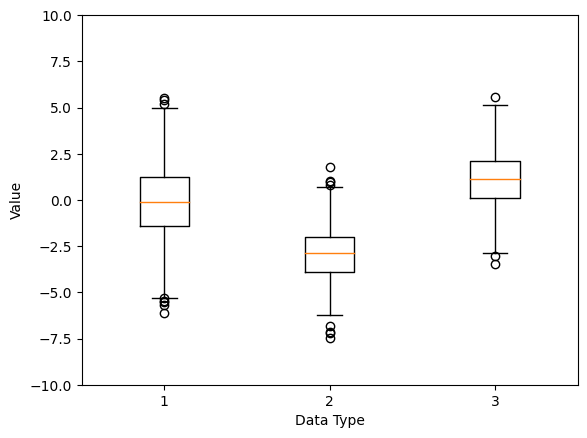

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# normal(평균, 표준편차, 개수)
data_a =np.random.normal(0, 2.0, 1000) 
data_b =np.random.normal(-3, 1.5, 500)
data_c =np.random.normal(1.2, 1.5, 1500)

plt.boxplot([data_a, data_b, data_c])
# ylim(최소,최대)
plt.ylim(-10,10)
plt.xlabel('Data Type')
plt.ylabel('Value')
plt.show()

In [8]:
np.random.seed(0)
# 평균 :0, 표준편차 :2 , 1000개
data_a = np.random.normal(0,2.0,1000) 
print(f'np.min():{np.min(data_a):.3f},np.median():{np.median(data_a):.3f}, np.max():{np.max(data_a):.3f}')
quantile = np.quantile(data_a, [0,0.25,0.5,0.75,1])
print(quantile)
IQR = quantile[3] - quantile[1]
print("IQR: ",IQR)
print("MAX: ",quantile[3] + (1.5*IQR))
print("MIN: ",quantile[1] - (1.5*IQR))

np.min():-6.092,np.median():-0.116, np.max():5.519
[-6.09228611 -1.39684012 -0.11605607  1.2139012   5.51871023]
IQR:  2.610741322496538
MAX:  5.1300131875216035
MIN:  -5.312952102464548


(95,)


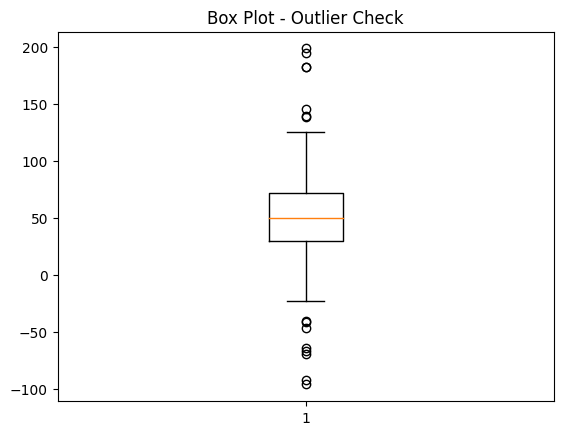

In [12]:
np.random.seed(10)
#  [x,y) << x이상 y미만 

#  [0,100) 사이의 값 50개
spread = np.random.rand(50) * 100
# 50(중앙값)으로 이루어진 25개
center = np.ones(25)*50
# [100,200) 사이의 값 10개
filer_high = np.random.rand(10) * 100 + 100
# [-100,0) 사이의 값 10개
filer_low = np.random.rand(10) * 100 - 100

data = np.concatenate([spread,center,filer_high,filer_low])
print(data.shape)

plt.boxplot(data)
plt.title('Box Plot - Outlier Check')
plt.show()

# 10 실습 문제
### 매체별 광고 투자금액에 따른 상품 판매 효과 비교
- 선 그래프로 표현한다.
- 광고 매체는 tv와 google_adds 두 가지로 한다.
- x(광고투자금 의미) 값은 5~45 사이의 5간격으로 만들어진 연속된 값
- y(상품 판매금액) 값은 1~64 사이의 랜덤 정수 (seed 10, 오름차순)
- google_adds의 y값은 1~74 사이의 랜덤 정수 (seed는 10, 오름차순)

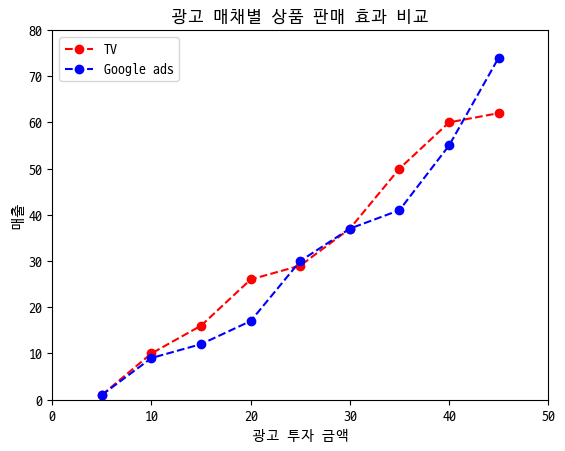

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['font.family'] = 'D2Coding ligature'



np.random.seed(10)
x_invest = np.arange(5,46,5)
y_tv = np.sort(np.random.randint(1,65,9))
y_google = np.sort(np.random.randint(1,75,9))

plt.plot(x_invest,y_tv,'ro--',label='TV')
plt.plot(x_invest,y_google,'bo--',label='Google ads')
plt.axis([0,50,0,80])

plt.legend()
plt.title('광고 매채별 상품 판매 효과 비교')
plt.xlabel('광고 투자 금액')
plt.ylabel('매출')

plt.show()

### 국가별 주류 소비량 상위 20개국 비교
- 막대 그래프로 표현한다.
- 주류 소비량은 '맥주,'증류주','와인' 소비량의 합계로 산출한다.

In [45]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

df = pd.read_csv('drinks.csv')
df.columns = ['국가','맥주','증류주','와인','순수알콜','대륙']
df['주류소비량'] = df[['맥주','증류주','와인']].sum(axis=1)
df.head(20)

,국가,맥주,증류주,와인,순수알콜,대륙,주류소비량
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
5,Antigua & Barbuda,102,128,45,4.9,NaN,275
6,Argentina,193,25,221,8.3,SA,439
7,Armenia,21,179,11,3.8,EU,211
8,Australia,261,72,212,10.4,OC,545
9,Austria,279,75,191,9.7,EU,545


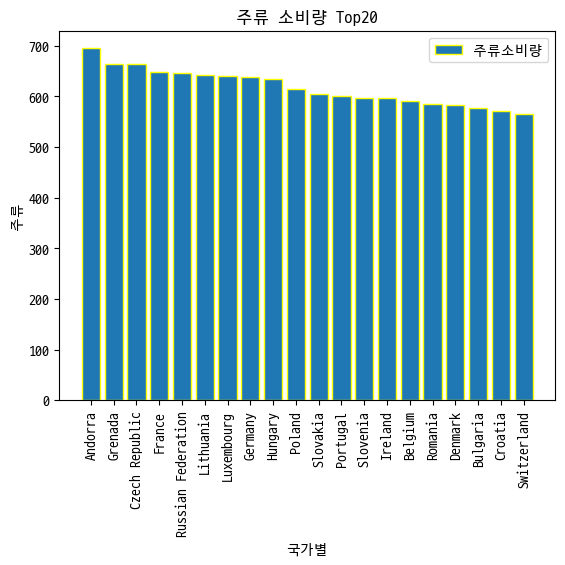

In [49]:
top_20 = df.sort_values('주류소비량',ascending=False)[['국가','주류소비량']].head(20)
top_20

x = np.arange(len(top_20))
y = top_20['주류소비량']
x_label = top_20['국가']

plt.bar(x, y, edgecolor='yellow', label='주류소비량')
plt.xticks(x,x_label, rotation=90)

plt.title('주류 소비량 Top20')
plt.xlabel('국가별')
plt.ylabel('주류')
plt.legend()
plt.show()